# Fruits & vegetables dataset helper

Kaggle source: <https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition>

Remote: <https://www.kaggle.com/api/v1/datasets/download/kritikseth/fruit-and-vegetable-image-recognition>

This helper notebook can be used to wrao the data into custom Dataset subclass. This is a prototype - an importable method is located in _cvision.data_ module.

In [1]:
import os
import shutil
import random
import matplotlib.pyplot as plt
import requests
import zipfile
import torch

from pathlib import Path

from cvision import data

In [2]:
# assuming that dataset is downloaded into /tmp/fruits/archive.zip

local = Path("/tmp/fruits/archive.zip")

assert local.exists()
with zipfile.ZipFile(local, "r") as f:
    f.extractall(local.parent)

print(f"Extracted to {local.parent}")

Extracted to /tmp/fruits


In [3]:
ds = data.VisionDataset(path=(local.parent / "train"))

print(f"# images: {len(ds)}")
print(f"# classes: {len(ds.classes)}")
print(f"classes: {ds.classes}")

# images: 2780
# classes: 36
classes: ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


Text(0.5, 1.0, 'watermelon')

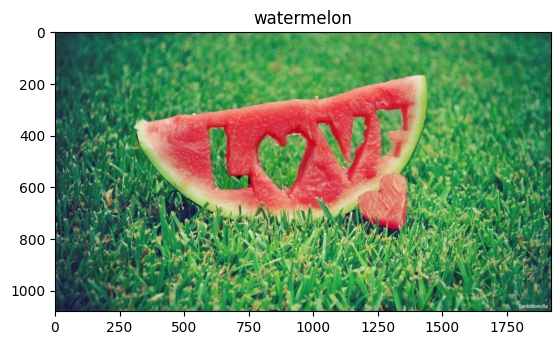

In [4]:
sample = random.choice(ds)
plt.imshow(sample[0])
plt.title(ds.classes[sample[1]])